<div style="font-family: Arial; color: #5DADE2; text-align: center; font-size: 36px;">
    <i>Compte Rendu TP 4 Atelier ML</i>
    </br>
    </br>
    <i>Etude de Cas</i>
</div>
<div style="font-family: Arial; color: #27AE60 ; font-size: 20px;">
    <b>Réalisé Par:</b>
</div>
<ul style="font-family: Arial; color: #2E86C1 ; font-size: 18px;">
    <li>Ouhibi Ons</li>
    <li>Ben Zaied Mouna</li>
</ul>
<div style="font-family: Arial; color: #27AE60 ; text-align: left; padding-left: 20px; font-size: 15px;">
    <b>RT4 Groupe 2</b>
</div>


</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
        <b>Visualisation de la dataset "Portuguese Bank Marketing Data Set" : </b>
</div>
</br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
bank_data = pd.read_csv('bank-full.csv',sep=';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 

</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Analyse des données:</b>
</div>
</br>

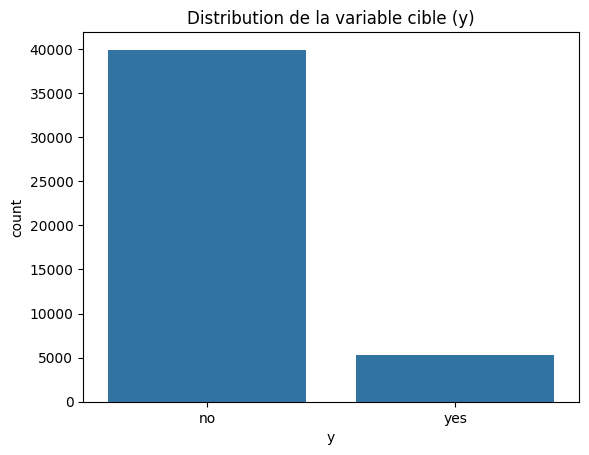

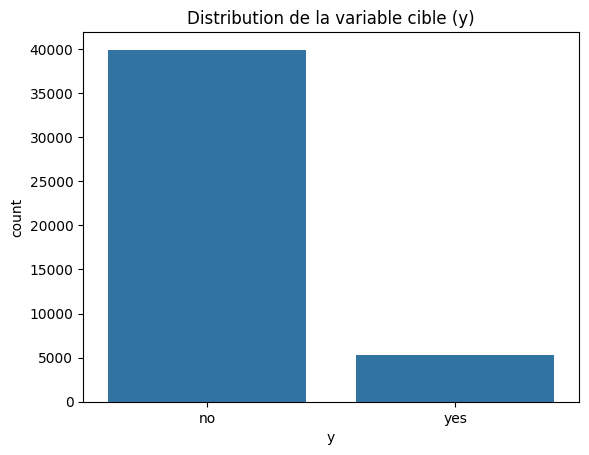

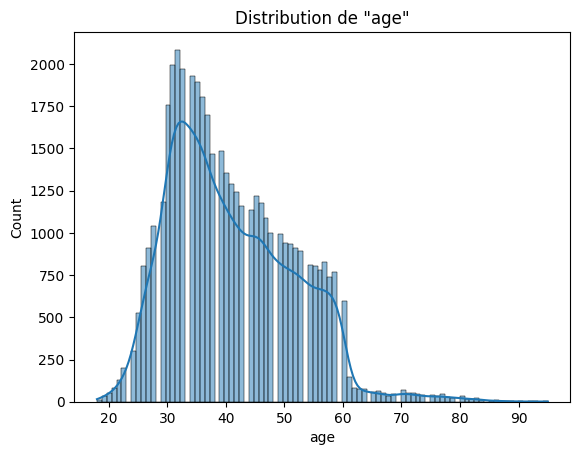

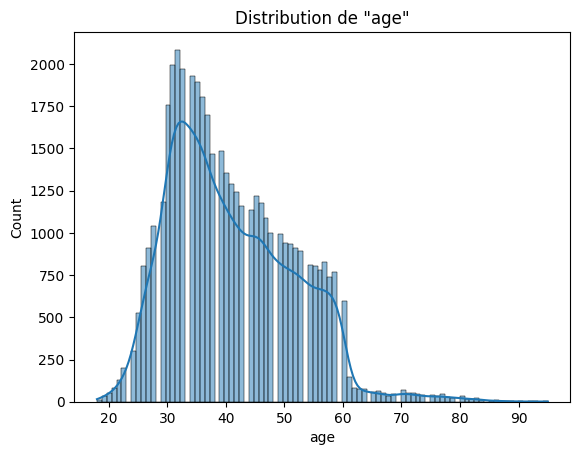

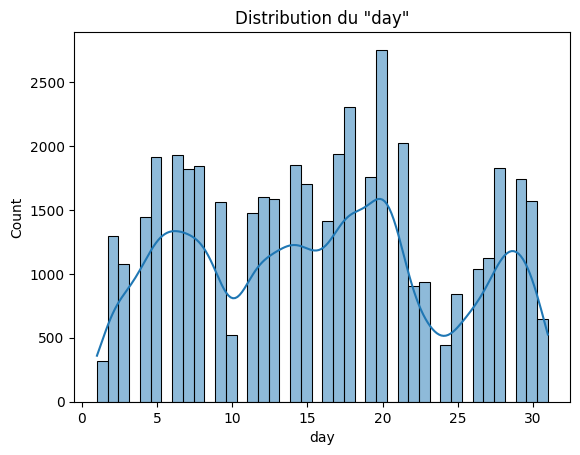

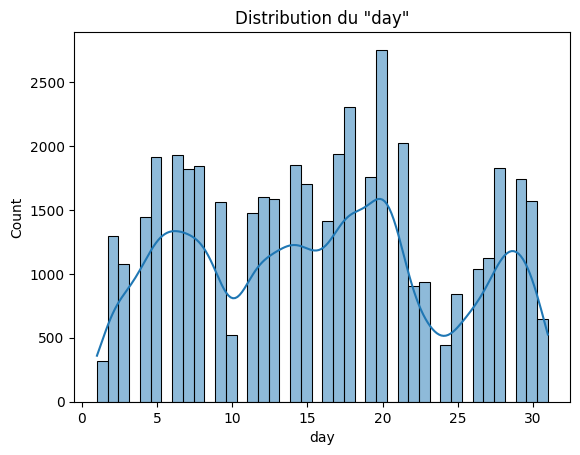

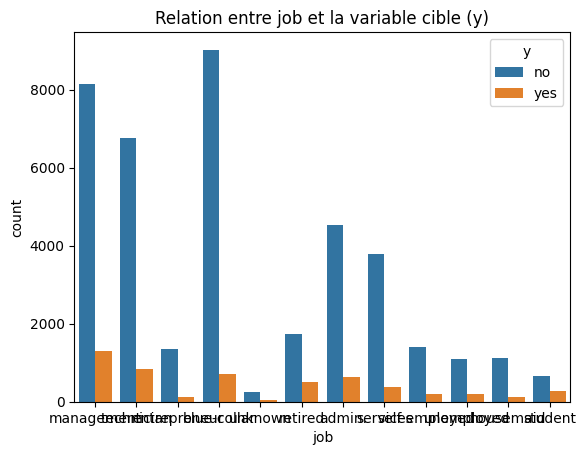

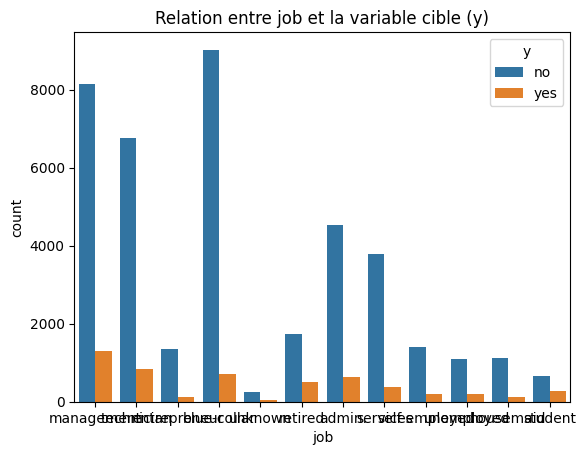

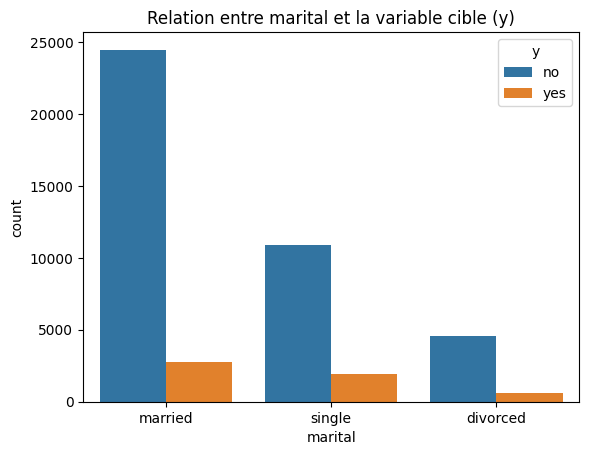

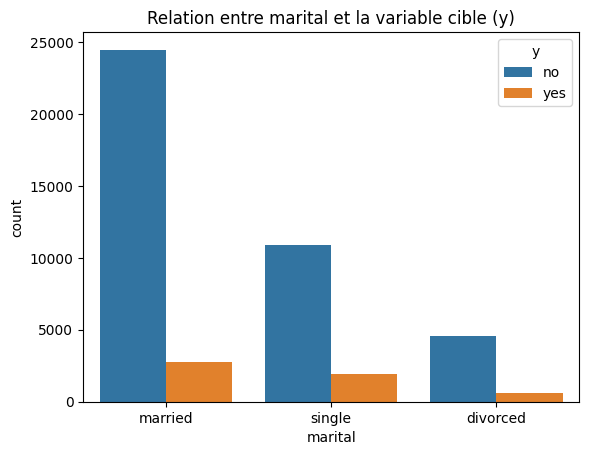

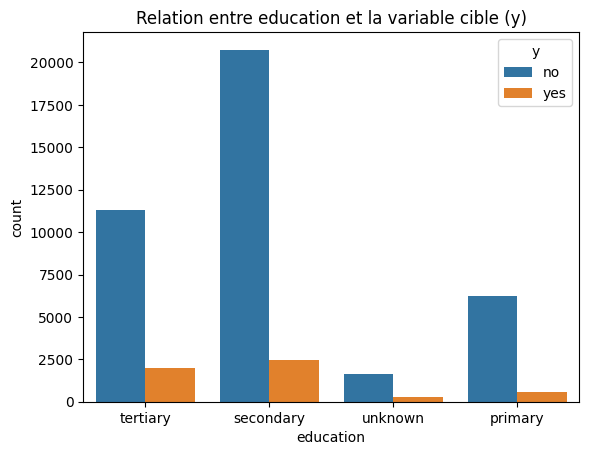

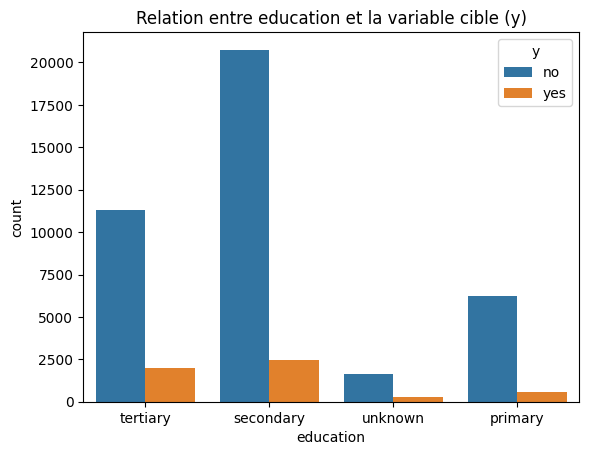

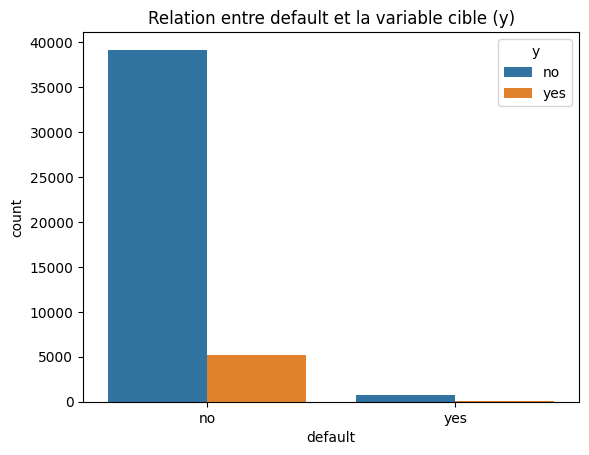

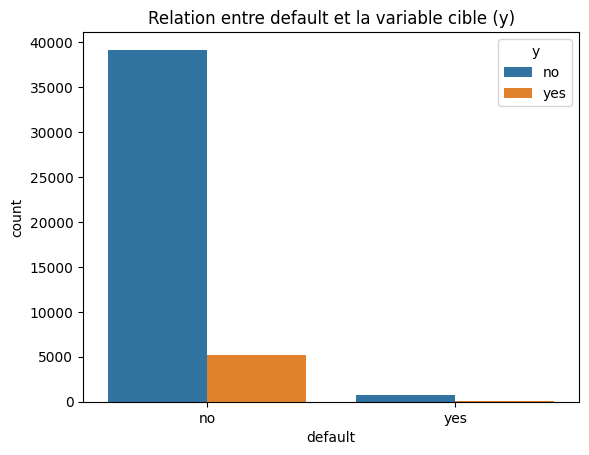

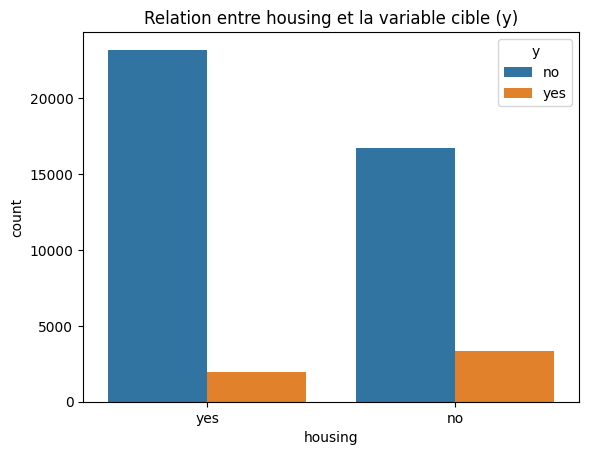

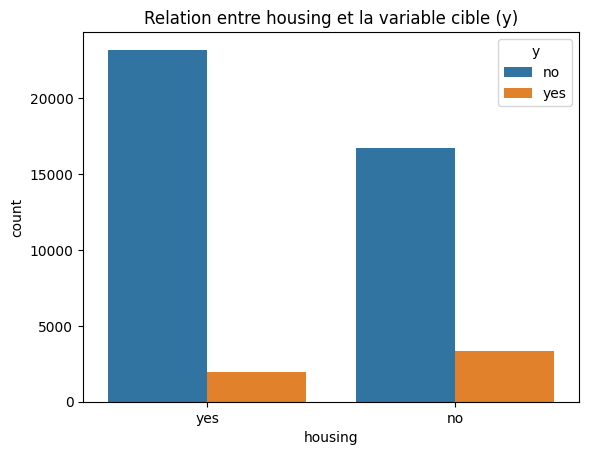

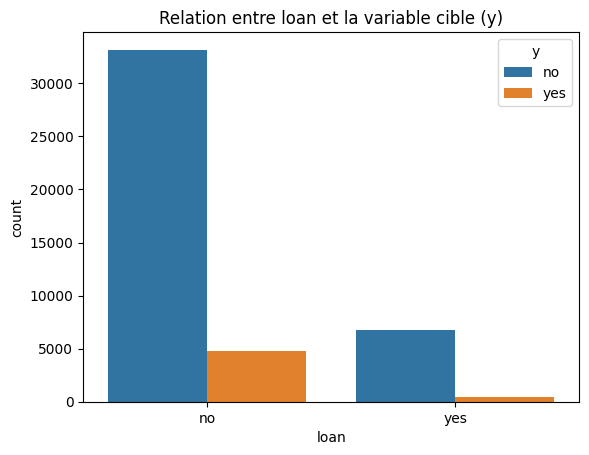

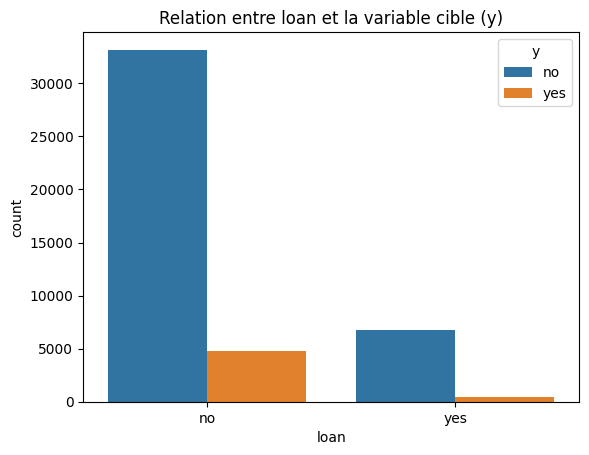

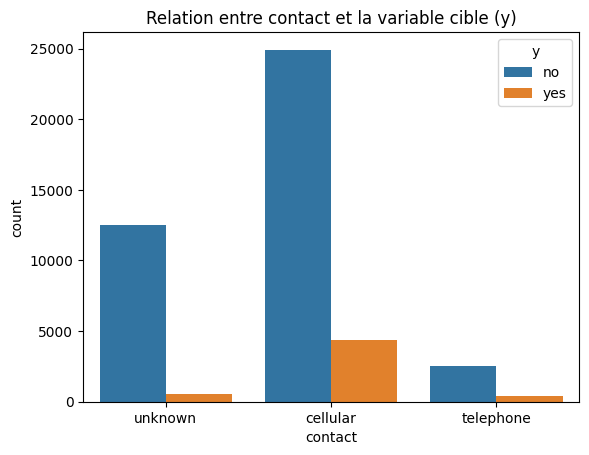

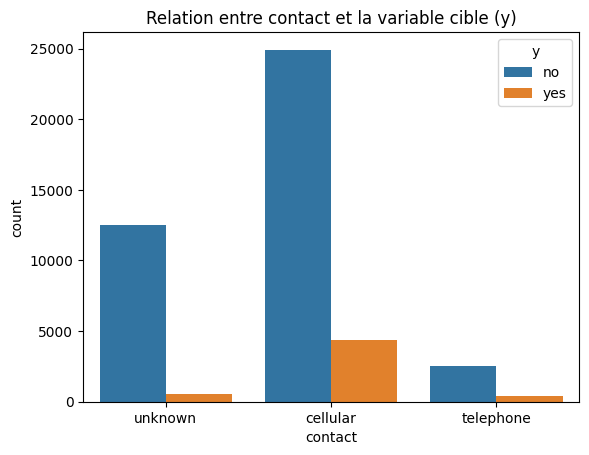

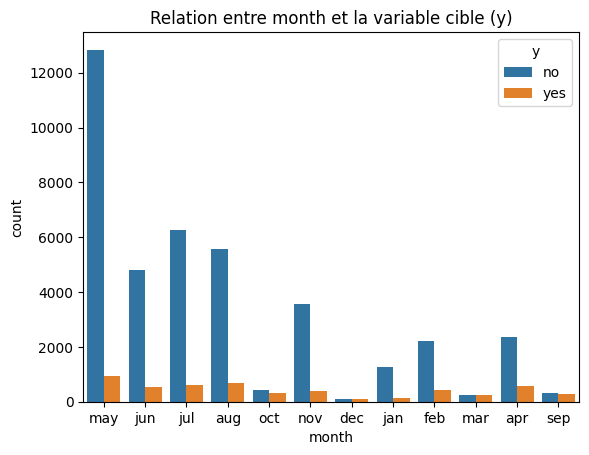

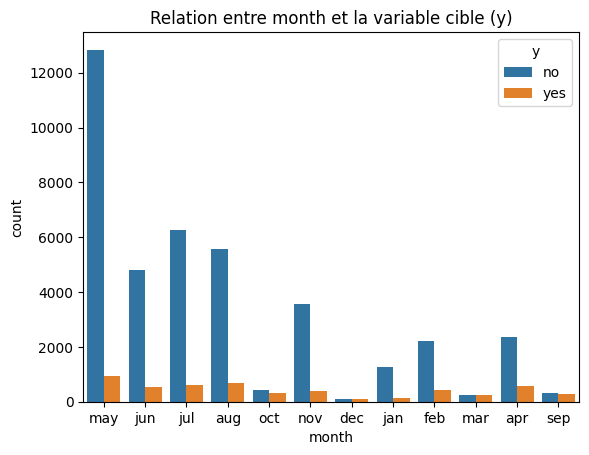

In [5]:
# Visualiser la distribution de la variable cible
sns.countplot(x='y', data=bank_data)
plt.title('Distribution de la variable cible (y)')
plt.show()

# Visualiser la distribution de l'âge
sns.histplot(bank_data['age'], kde=True)
plt.title('Distribution de "age"')
plt.show()

# Visualiser la distribution du jour
sns.histplot(bank_data['day'], kde=True)
plt.title('Distribution du "day"')
plt.show()

# Exclure les relations indésirables entre les variables catégorielles et la variable cible
features_categorielles = bank_data.select_dtypes(include=['object']).columns
for feature in features_categorielles:
    # Exclure 'y' et 'poutcome' de la visualisation
    if feature not in ['y', 'poutcome']:
        sns.countplot(x=feature, hue='y', data=bank_data)
        plt.title(f'Relation entre {feature} et la variable cible (y)')
        plt.show()


<div style="font-family: Arial; color: #27AE60 ; font-size: 30px;">
    <b> Interprétation: </b>
</div>
</br>
<div>
    <p>Ces visualisations ont été sélectionnées pour obtenir une vue d'ensemble des caractéristiques du jeu de données. La distribution de la variable cible donne des informations cruciales sur l'équilibre des classes. Les histogrammes pour l'âge et le jour fournissent des aperçus des distributions numériques. Enfin, les graphiques à barres empilées facilitent l'observation des relations entre les variables catégorielles et la variable cible, en mettant en évidence les variations dans les résultats de la campagne en fonction des différentes catégories. Ces visualisations contribuent à une compréhension approfondie des données avant la modélisation.
</p>
</div>

</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Pré-traitement des données :</b>
</div>
</br>

</br>
<div style="font-family: Arial; color: red ; font-size: 20px;">
    <b>Encodage des variables catégorielles:</b>
</div>
</br>

In [6]:
label_encoder = LabelEncoder()
bank_data['job'] = label_encoder.fit_transform(bank_data['job'])
bank_data['marital'] = label_encoder.fit_transform(bank_data['marital'])
bank_data['education'] = label_encoder.fit_transform(bank_data['education'])
bank_data['contact'] = label_encoder.fit_transform(bank_data['contact'])
bank_data['month'] = label_encoder.fit_transform(bank_data['month'])
bank_data['poutcome'] = label_encoder.fit_transform(bank_data['poutcome'])

In [7]:
bank_data['default'].replace({'yes': 1, 'no': 0}, inplace=True)
bank_data['default'].value_counts()

bank_data['housing'].replace({'yes': 1, 'no': 0}, inplace=True)
bank_data['housing'].value_counts()

bank_data['loan'].replace({'yes': 1, 'no': 0}, inplace=True)
bank_data['loan'].value_counts()

bank_data['y'].replace({'yes': 1, 'no': 0}, inplace=True)
bank_data['y'].value_counts()

bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


<div style="font-family: Arial; color: #27AE60 ; font-size: 30px;">
    <b> Interprétation: </b>
</div>
</br>
<div>
    <p>L'encodage des variables catégorielles est une étape cruciale dans la préparation des données pour l'apprentissage automatique. En convertissant les catégories en nombres, le modèle peut interpréter et utiliser ces informations de manière plus efficace.

Cette transformation garantit que toutes les caractéristiques du jeu de données sont représentées de manière cohérente et appropriée pour l'entraînement d'un modèle. En fin de compte, cela améliore la capacité du modèle à extraire des modèles significatifs et à prendre des décisions éclairées lors de la prédiction des résultats de la campagne marketing.
</p>
</div>

</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Construction du modèle :</b>
</div>
</br>

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(bank_data.drop('y', axis=1), bank_data['y'], test_size=0.2, random_state=42)

# Créer un classifieur de forêt aléatoire
rf = RandomForestClassifier()

# Entraîner le modèle sur les données d'entraînement
rf.fit(X_train, y_train)


RandomForestClassifier()

RandomForestClassifier()

</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Evaluation du modèle :</b>
</div>
</br>

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prédictions sur l'ensemble de test
y_pred = rf.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher le Rapport de classification

print("Rapport de classification :\n", classification_report(y_test, y_pred))


Accuracy: 0.9018024991706293
Rapport de classification :
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.64      0.42      0.51      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.73      9043
weighted avg       0.89      0.90      0.89      9043

Accuracy: 0.9018024991706293
Rapport de classification :
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.64      0.42      0.51      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.73      9043
weighted avg       0.89      0.90      0.89      9043



</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Visualisation des forêts aléatoires:</b>
</div>
</br>

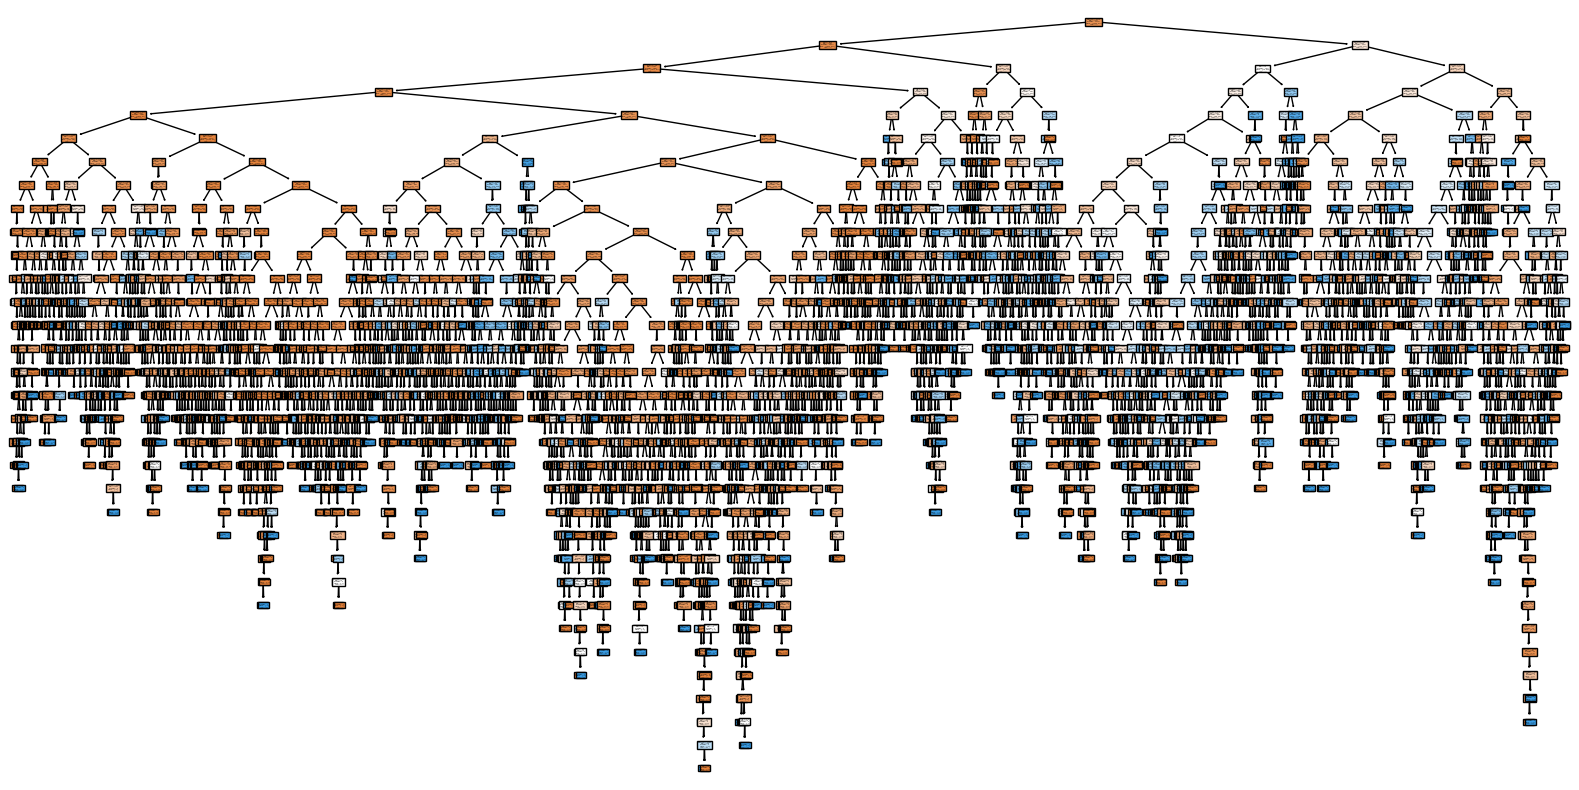

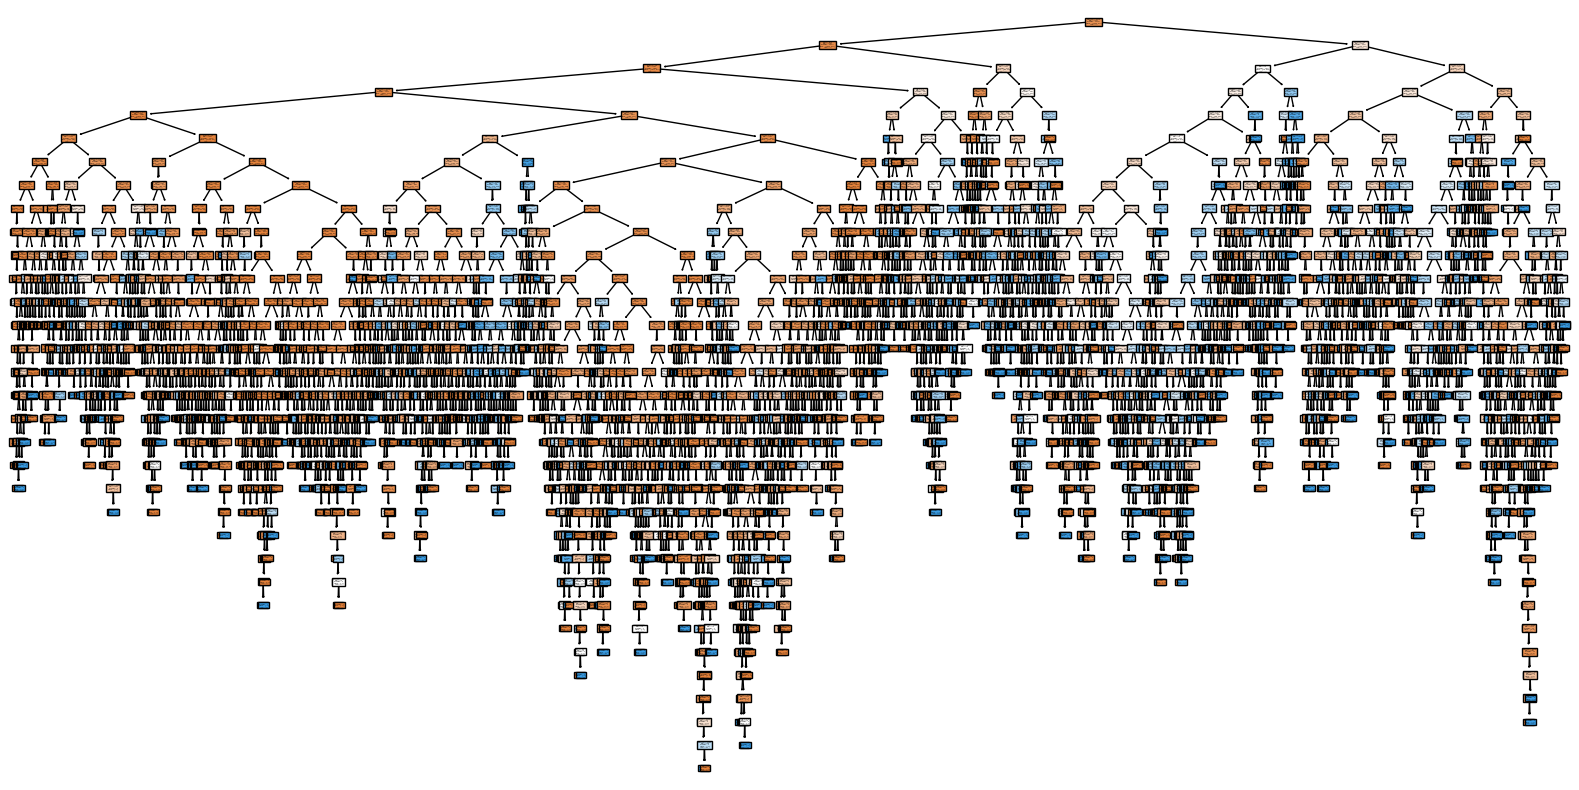

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=X_train.columns, class_names=['no', 'yes'], filled=True)
plt.show()


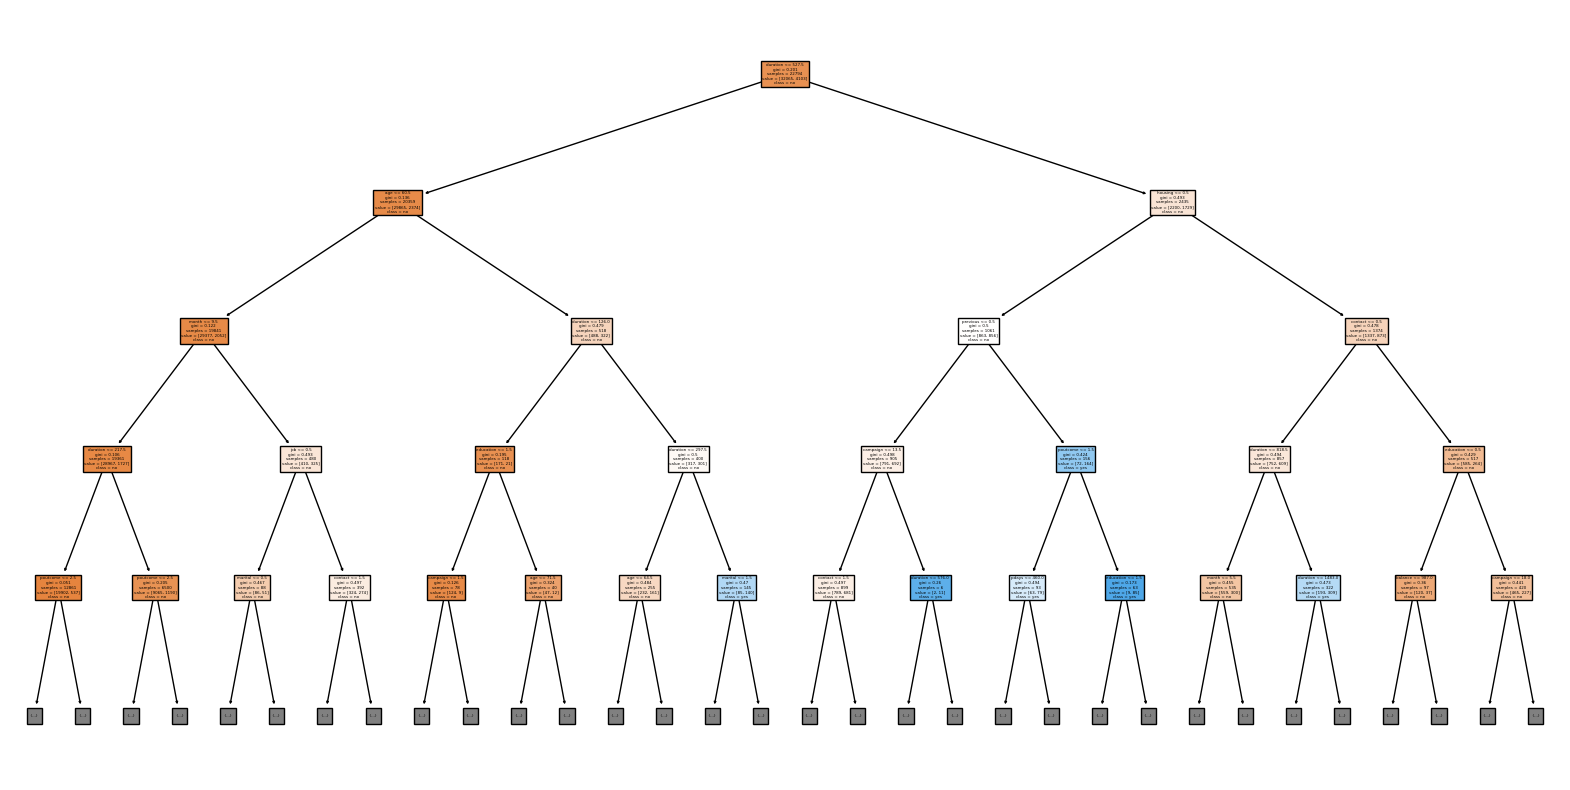

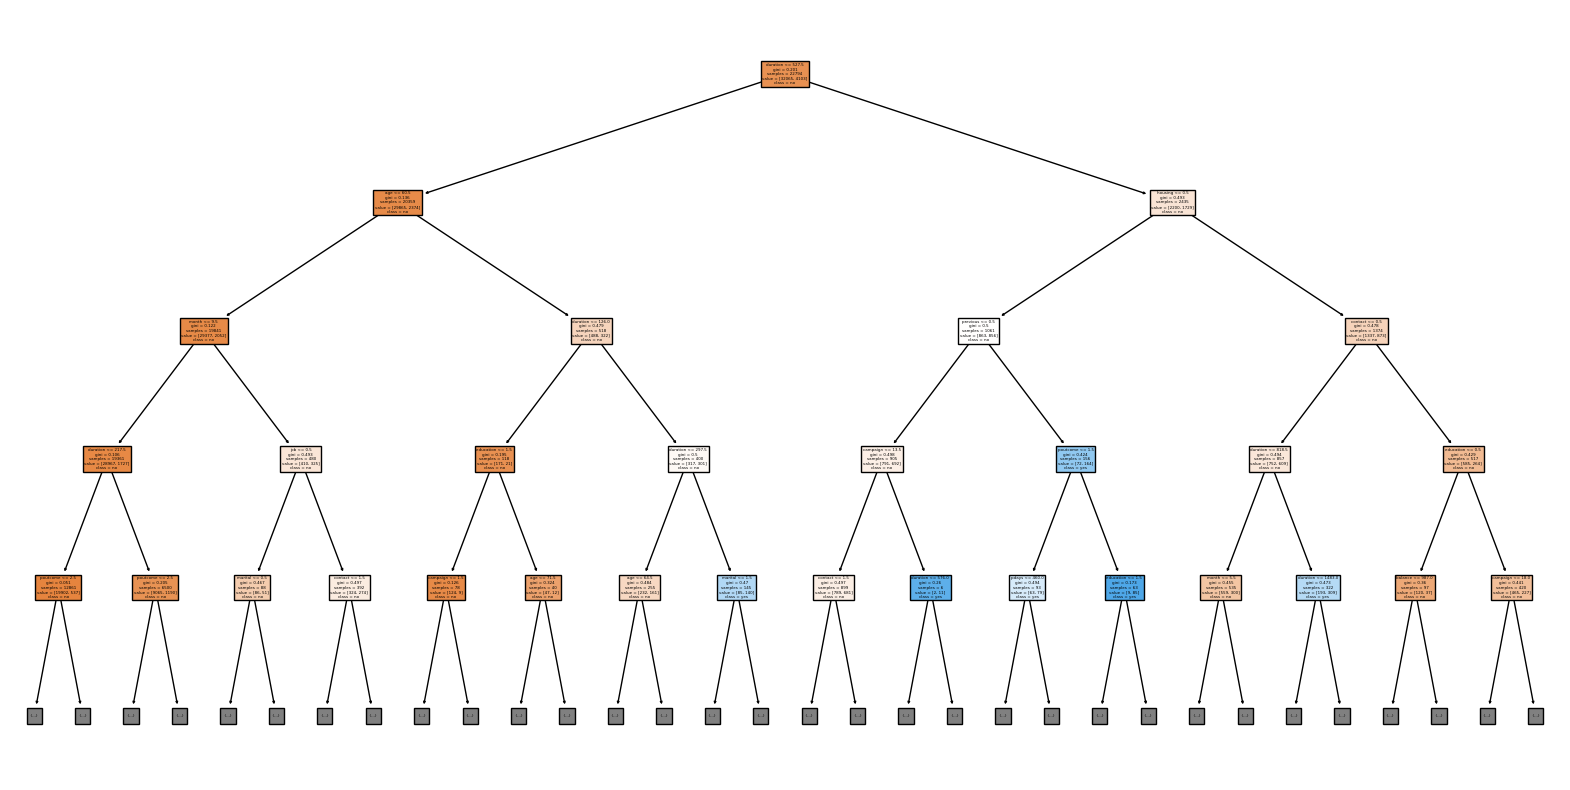

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=X_train.columns, class_names=['no', 'yes'], filled=True, max_depth=4)
plt.show()


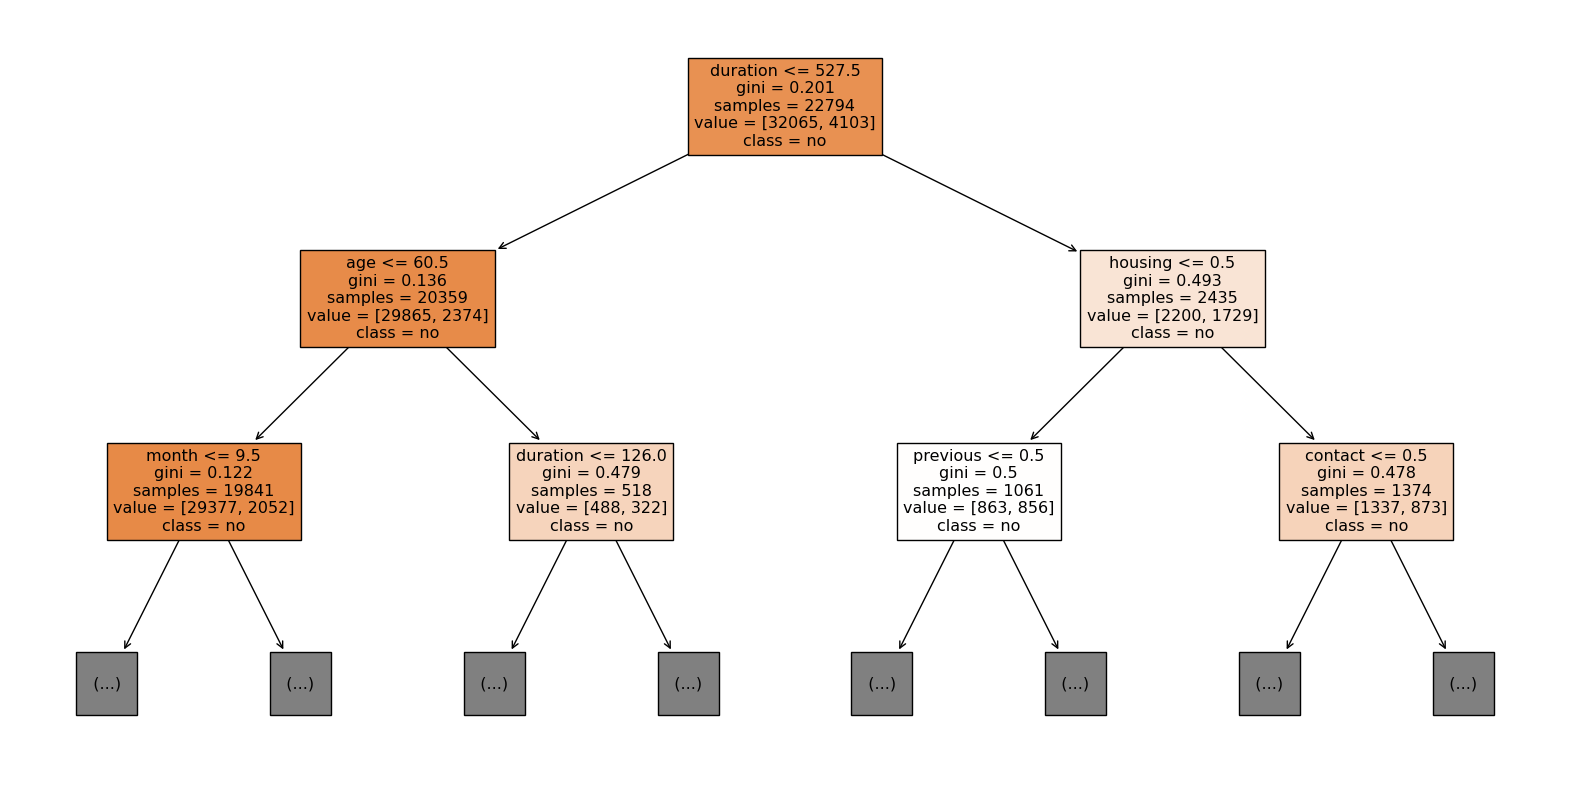

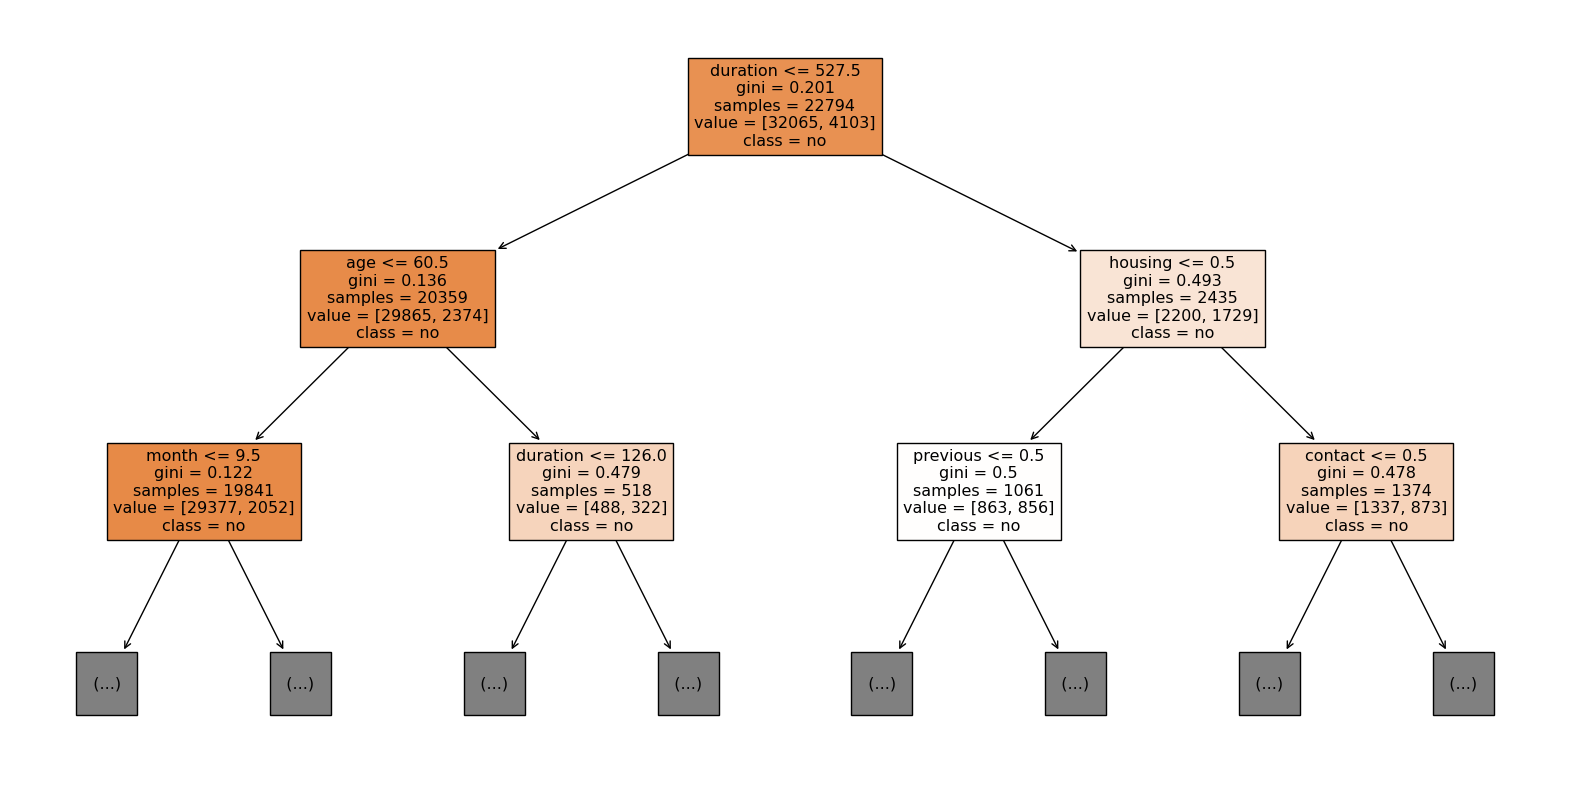

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=X_train.columns, class_names=['no', 'yes'], filled=True, max_depth=2)
plt.show()


</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Optimisation des performances du modèle en utilisant « RandomizedSearchCV »:</b>
</div>
</br>

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Définir les plages de valeurs des hyperparamètres
param_dist = {'n_estimators': randint(50, 500),'max_depth': randint(1, 20)}

# Créer un classifieur de forêt aléatoire
rf = RandomForestClassifier()

# Utiliser la recherche aléatoire pour trouver les meilleurs hyperparamètres
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)

# Créer une variable pour le meilleur modèle
best_rf = rand_search.best_estimator_

# Afficher les meilleurs hyperparamètres
print('Meilleurs hyperparamètres:', rand_search.best_params_)

# Calculer l'accuracy sur l'ensemble de test avec le meilleur modèle
accuracy_best_model = best_rf.score(X_test, y_test)
print("Accuracy du meilleur modèle:", accuracy_best_model)


Meilleurs hyperparamètres: {'max_depth': 14, 'n_estimators': 87}
Meilleurs hyperparamètres: {'max_depth': 14, 'n_estimators': 87}
Accuracy du meilleur modèle: 0.902134247484242
Accuracy du meilleur modèle: 0.902134247484242


</br>
<div style="font-family: Arial; color: #27AE60 ; font-size: 45px;">
    <b>Nettoyage de la dataset pour améliorer la performance du modèle:</b>
</div>
</br>

In [14]:
bank_data = pd.read_csv('bank-full.csv',sep=';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


</br>
<div style="font-family: Arial; color: red ; font-size: 20px;">
    <b> Traitement des valeurs manquantes:</b>
</div>
</br>

In [15]:
# Supposons que votre DataFrame s'appelle bank_data_encoded
unknown_counts = {}
# Parcourir chaque colonne du DataFrame
for column in bank_data.columns:
    # Compter le nombre de 'unknown' dans la colonne
    unknown_count = bank_data[column].value_counts().get('unknown', 0)
    
    # Ajouter le nombre d'unknown dans le dictionnaire
    unknown_counts[column] = unknown_count

# Afficher le nombre d'unknown pour chaque colonne
for column, count in unknown_counts.items():
    print(f'"{column}": {count}  "unknown"')

"age": 0  "unknown"
"job": 288  "unknown"
"marital": 0  "unknown"
"education": 1857  "unknown"
"default": 0  "unknown"
"balance": 0  "unknown"
"housing": 0  "unknown"
"loan": 0  "unknown"
"contact": 13020  "unknown"
"day": 0  "unknown"
"month": 0  "unknown"
"duration": 0  "unknown"
"campaign": 0  "unknown"
"pdays": 0  "unknown"
"previous": 0  "unknown"
"poutcome": 36959  "unknown"
"y": 0  "unknown"
"age": 0  "unknown"
"job": 288  "unknown"
"marital": 0  "unknown"
"education": 1857  "unknown"
"default": 0  "unknown"
"balance": 0  "unknown"
"housing": 0  "unknown"
"loan": 0  "unknown"
"contact": 13020  "unknown"
"day": 0  "unknown"
"month": 0  "unknown"
"duration": 0  "unknown"
"campaign": 0  "unknown"
"pdays": 0  "unknown"
"previous": 0  "unknown"
"poutcome": 36959  "unknown"
"y": 0  "unknown"


In [16]:
# Supposons que votre DataFrame s'appelle bank_data_encoded
other_counts = {}
# Parcourir chaque colonne du DataFrame
for column in bank_data.columns:
    # Compter le nombre de 'unknown' dans la colonne
    other_count = bank_data[column].value_counts().get('other', 0)
    
    # Ajouter le nombre d'unknown dans le dictionnaire
    other_counts[column] = other_count

# Afficher le nombre d'unknown pour chaque colonne
for column, count in other_counts.items():
    print(f'"{column}": {count}  "other"')

"age": 0  "other"
"job": 0  "other"
"marital": 0  "other"
"education": 0  "other"
"default": 0  "other"
"balance": 0  "other"
"housing": 0  "other"
"loan": 0  "other"
"contact": 0  "other"
"day": 0  "other"
"month": 0  "other"
"duration": 0  "other"
"campaign": 0  "other"
"pdays": 0  "other"
"previous": 0  "other"
"poutcome": 1840  "other"
"y": 0  "other"
"age": 0  "other"
"job": 0  "other"
"marital": 0  "other"
"education": 0  "other"
"default": 0  "other"
"balance": 0  "other"
"housing": 0  "other"
"loan": 0  "other"
"contact": 0  "other"
"day": 0  "other"
"month": 0  "other"
"duration": 0  "other"
"campaign": 0  "other"
"pdays": 0  "other"
"previous": 0  "other"
"poutcome": 1840  "other"
"y": 0  "other"


In [17]:
bank_data = bank_data.drop(columns=['poutcome','contact'])
bank_data = bank_data[(bank_data['education'] != 'unknown') & (bank_data['job'] != 'unknown')]
bank_data.sample(10)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
6836,29,admin.,married,tertiary,no,26,yes,no,28,may,45,1,-1,0,no
2939,41,technician,married,secondary,no,1043,yes,yes,14,may,225,1,-1,0,no
5031,48,blue-collar,divorced,primary,no,338,yes,no,21,may,38,12,-1,0,no
40266,26,admin.,single,tertiary,no,617,no,no,15,jun,157,1,-1,0,no
33083,39,management,single,tertiary,no,1340,yes,no,20,apr,287,3,-1,0,no
2920,34,blue-collar,married,primary,no,357,yes,no,14,may,197,2,-1,0,no
9305,51,admin.,married,secondary,no,1699,no,no,5,jun,153,2,-1,0,no
1787,32,management,married,tertiary,no,0,no,no,9,may,280,1,-1,0,no
29701,55,unemployed,divorced,primary,no,-53,no,no,3,feb,225,4,6,3,no
6328,36,management,married,tertiary,no,-825,no,no,27,may,95,1,-1,0,no


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
6836,29,admin.,married,tertiary,no,26,yes,no,28,may,45,1,-1,0,no
2939,41,technician,married,secondary,no,1043,yes,yes,14,may,225,1,-1,0,no
5031,48,blue-collar,divorced,primary,no,338,yes,no,21,may,38,12,-1,0,no
40266,26,admin.,single,tertiary,no,617,no,no,15,jun,157,1,-1,0,no
33083,39,management,single,tertiary,no,1340,yes,no,20,apr,287,3,-1,0,no
2920,34,blue-collar,married,primary,no,357,yes,no,14,may,197,2,-1,0,no
9305,51,admin.,married,secondary,no,1699,no,no,5,jun,153,2,-1,0,no
1787,32,management,married,tertiary,no,0,no,no,9,may,280,1,-1,0,no
29701,55,unemployed,divorced,primary,no,-53,no,no,3,feb,225,4,6,3,no
6328,36,management,married,tertiary,no,-825,no,no,27,may,95,1,-1,0,no


In [18]:
unknown_counts = {} 

target_columns = ['job', 'education']

for column in target_columns:    
    unknown_count = (bank_data[column] == 'unknown').sum()
    unknown_counts[column] = unknown_count

# Afficher le nombre d'occurrences de 'unknown' pour chaque colonne
for column, count in unknown_counts.items():
    print(f'"{column}": {count} "unknown"')


"job": 0 "unknown"
"education": 0 "unknown"
"job": 0 "unknown"
"education": 0 "unknown"


<div style="font-family: Arial; color: #27AE60 ; font-size: 30px;">
    <b> Interprétation: </b>
</div>
</br>
<div>
    <p>Dans le processus de prétraitement des données, deux mesures importantes ont été prises pour gérer les valeurs manquantes dans le DataFrame. En premier lieu, les colonnes "contact" et "poutcome" ont été supprimées en raison d'un nombre significatif de valeurs "unknown", évitant ainsi tout impact potentiellement négatif sur les analyses ultérieures et la modélisation. Ensuite, une approche ciblée a été adoptée pour traiter les valeurs manquantes dans les colonnes "education" et "job". Les lignes correspondantes avec des informations manquantes dans ces domaines clés ont été éliminées, contribuant ainsi à améliorer la qualité des données pour des analyses plus précises.  </p>
</div>

</br>
<div style="font-family: Arial; color: red ; font-size: 20px;">
    <b>Encodage des variables catégorielles:</b>
</div>
</br>

In [19]:
label_encoder = LabelEncoder()
bank_data['job'] = label_encoder.fit_transform(bank_data['job'])
bank_data['marital'] = label_encoder.fit_transform(bank_data['marital'])
bank_data['education'] = label_encoder.fit_transform(bank_data['education'])
bank_data['month'] = label_encoder.fit_transform(bank_data['month'])
bank_data['default'].replace({'yes': 1, 'no': 0}, inplace=True)
bank_data['default'].value_counts()

bank_data['housing'].replace({'yes': 1, 'no': 0}, inplace=True)
bank_data['housing'].value_counts()

bank_data['loan'].replace({'yes': 1, 'no': 0}, inplace=True)
bank_data['loan'].value_counts()

bank_data['y'].replace({'yes': 1, 'no': 0}, inplace=True)
bank_data['y'].value_counts()

bank_data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,0
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0,0
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0,0
5,35,4,1,2,0,231,1,0,5,8,139,1,-1,0,0
6,28,4,2,2,0,447,1,1,5,8,217,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,17,9,977,3,-1,0,1
45207,71,5,0,0,0,1729,0,0,17,9,456,2,-1,0,1
45208,72,5,1,1,0,5715,0,0,17,9,1127,5,184,3,1
45209,57,1,1,1,0,668,0,0,17,9,508,4,-1,0,0


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,0
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0,0
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0,0
5,35,4,1,2,0,231,1,0,5,8,139,1,-1,0,0
6,28,4,2,2,0,447,1,1,5,8,217,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,17,9,977,3,-1,0,1
45207,71,5,0,0,0,1729,0,0,17,9,456,2,-1,0,1
45208,72,5,1,1,0,5715,0,0,17,9,1127,5,184,3,1
45209,57,1,1,1,0,668,0,0,17,9,508,4,-1,0,0


</br>
<div style="font-family: Arial; color: red ; font-size: 20px;">
    <b>Construction du modèle :</b>
</div>
</br>

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(bank_data.drop('y', axis=1), bank_data['y'], test_size=0.2, random_state=42)

# Créer un classifieur de forêt aléatoire
rf = RandomForestClassifier()

# Entraîner le modèle sur les données d'entraînement
rf.fit(X_train, y_train)


RandomForestClassifier()

RandomForestClassifier()

</br>
<div style="font-family: Arial; color: red ; font-size: 20px;">
    <b>Evaluation du modèle :</b>
</div>
</br>

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prédictions sur l'ensemble de test
y_pred = rf.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher le Rapport de classification

print("Rapport de classification :\n", classification_report(y_test, y_pred))

Accuracy: 0.901840490797546
Rapport de classification :
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7658
           1       0.62      0.36      0.45       981

    accuracy                           0.90      8639
   macro avg       0.77      0.66      0.70      8639
weighted avg       0.89      0.90      0.89      8639

Accuracy: 0.901840490797546
Rapport de classification :
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7658
           1       0.62      0.36      0.45       981

    accuracy                           0.90      8639
   macro avg       0.77      0.66      0.70      8639
weighted avg       0.89      0.90      0.89      8639



<div style="font-family: Arial; color: #27AE60 ; font-size: 30px;">
    <b> Interprétation: </b>
</div>
</br>
<div>
    <p>Le nettoyage de la dataset et l'encodage effectués ont contribué à l'amélioration de l'accuracy du modèle.Ces étapes ont fortifié la qualité des données d'entrée, ce qui a probablement conduit à des prédictions plus précises et, par conséquent, à une amélioration de l'accuracy du modèle de forêt aléatoire.
  </p>
</div>

</br>
<div style="font-family: Arial; color: red ; font-size: 20px;">
    <b>Optimisation des performances du modèle en utilisant « RandomizedSearchCV »:</b>
</div>
</br>

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Définir les plages de valeurs des hyperparamètres
param_dist = {'n_estimators': randint(50, 500),'max_depth': randint(1, 20)}

# Créer un classifieur de forêt aléatoire
rf = RandomForestClassifier()

# Utiliser la recherche aléatoire pour trouver les meilleurs hyperparamètres
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)

# Créer une variable pour le meilleur modèle
best_rf = rand_search.best_estimator_

# Afficher les meilleurs hyperparamètres
print('Meilleurs hyperparamètres:', rand_search.best_params_)

# Calculer l'accuracy sur l'ensemble de test avec le meilleur modèle
accuracy_best_model = best_rf.score(X_test, y_test)
print("Accuracy du meilleur modèle:", accuracy_best_model)


Meilleurs hyperparamètres: {'max_depth': 16, 'n_estimators': 390}
Meilleurs hyperparamètres: {'max_depth': 16, 'n_estimators': 390}
Accuracy du meilleur modèle: 0.9029980321796505
Accuracy du meilleur modèle: 0.9029980321796505
